### Usage example

In [1]:
import matplotlib.pyplot as plt
from k_armed_bandit import *

Create a Testbed as follows:

In [2]:
tenarm = Testbed(10, mean = 0, var = 4, playvar = 0.4)

If you have a specific rewards profile to investigate, you can choose this for your testbed instead

We can inspect the true rewards of each lever:

In [3]:
tenarm.truerewards

array([-2.42012193,  2.01382728, -1.04530441, -2.272132  , -2.68917266,
       13.52668432,  5.55505804, -2.64174741, -4.53153119, -1.39438003])

Choose the length of episodes and create agents to compare performance:

In [11]:
n = 10000

epsilongreedy1 = EpsilonGreedy(n,0.1)
epsilongreedy2 = EpsilonGreedy(n,0.01)
greedyplayer = EpsilonGreedy(n,0)

Let the agents learn on the testbed, simulating performance accross a specified number of runs to find an average:

In [15]:
epsilongreedy1.multsim(tenarm, 100)
epsilongreedy2.multsim(tenarm, 100)
greedyplayer.multsim(tenarm, 100)

Make a plot to compare their performances:

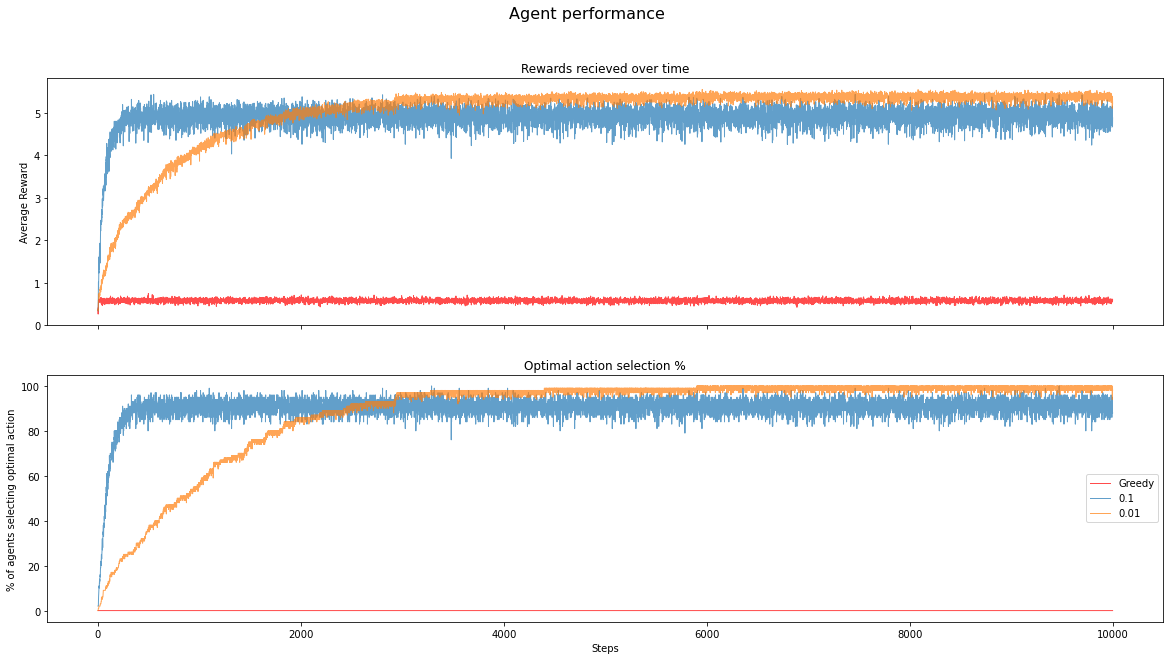

In [16]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(20,10))
axs[0].plot(range(n),greedyplayer.average_rewards, alpha=0.7, linewidth=1, label='Greedy', color='red')
axs[0].plot(range(n),epsilongreedy1.average_rewards, alpha=0.7, linewidth=1, label='0.1')
axs[0].plot(range(n),epsilongreedy2.average_rewards, alpha=0.7, linewidth=1, label='0.01')
axs[0].set_title('Rewards recieved over time')
axs[0].set_ylabel('Average Reward')
fig.suptitle('Agent performance', fontsize=16)
axs[1].plot(range(n),greedyplayer.optimal_action_percent, alpha=0.7, linewidth=1, label='Greedy', color='red')
axs[1].plot(range(n),epsilongreedy1.optimal_action_percent, alpha=0.7, linewidth=1, label='0.1')
axs[1].plot(range(n),epsilongreedy2.optimal_action_percent, alpha=0.7, linewidth=1, label='0.01')
axs[1].set_title('Optimal action selection %')
axs[1].set_ylabel('% of agents selecting optimal action')
plt.xlabel('Steps')
plt.legend()

See how many times it selected the optimal reward on a single run:

In [8]:
newagent = EpsilonGreedy(1000,0.1)
sum(newagent.play(tenarm)[1])

916